In [68]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency


In [21]:
# lendo o arquivo csv
df_obesidade = pd.read_csv(r'C:\Users\flavi_000\OneDrive\Flavienne\Cursos\Reprograma\S17 - Projeto Final 28.09\ObesityDataSet_raw_and_data_sinthetic.csv')
df_obesidade

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [23]:
#leitura das quantidades de linhas e colunas 
df_obesidade.shape

(2111, 17)

In [28]:
#Analisando estatísticas descritivas (count: conta valores não nulos, Indica o tamanho efetivo da amostra, excluindo valores faltantes;
# unique: conta os valores únicos, Indica o tamanho efetivo da amostra, excluindo valores faltantes, top: valor mais frequente,moda; freq: frequencia do malor mais frequente;
#mean: média aritmética; std: desvio-padrão;)
df_obesidade.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [15]:
#Visualizando a estrutura dos dados
df_obesidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [29]:
#Remover linhas duplicadas
df = df_obesidade.drop_duplicates()

In [30]:
#confirmar as alterações da remoção das linhas duplicadas, equivalente ao inplace 
df.shape

(2087, 17)

In [33]:
#renomear as colunas
df_obesidade.rename(columns= {
    'Gender': 'Sexo', 
    'Age': 'Idade', 
    'Height' : 'Altura', 
    'Weight': 'Peso', 
    'family_history_with_overweight': 'Histórico_familiar_excesso_peso',
    'FAVC': 'Consumo_frequente_alimentos_altamente_caloricos',
    'FCVC': 'Frequência_consumo_vegetais',
    'NCP':'Número_refeições_principais',                             
    'CAEC': 'Consumo_alimentos_entre_refeições',                           
    'SMOKE': 'Fumante',                           
    'CH2O': 'Consumo_diário_água',                           
    'SCC': 'Monitoramento_consumo_calorias',                            
    'FAF': 'Frequência_atividade_física',                             
    'TUE': 'Tempo_uso_dispositivos_tecnologia',                            
    'CALC': 'Consumo_álcool',                        
    'MTRANS': 'Meio_transporte_ utilizado',                        
    'NObeyesdad': 'Nível_obesidade'
    }, inplace=True)

In [34]:
df.shape

(2087, 17)

In [35]:
 #verificar os nomes das colunas p a próxima etapa
df_obesidade.columns

Index(['Sexo', 'Idade', 'Altura', 'Peso', 'Histórico_familiar_excesso_peso',
       'Consumo_frequente_alimentos_altamente_caloricos',
       'Frequência_consumo_vegetais', 'Número_refeições_principais',
       'Consumo_alimentos_entre_refeições', 'Fumante', 'Consumo_diário_água',
       'Monitoramento_consumo_calorias', 'Frequência_atividade_física',
       'Tempo_uso_dispositivos_tecnologia', 'Consumo_álcool',
       'Meio_transporte_ utilizado', 'Nível_obesidade'],
      dtype='object')

In [39]:
df_obesidade.head(10)

,Sexo,Idade,Altura,Peso,Histórico_familiar_excesso_peso,Consumo_frequente_alimentos_altamente_caloricos,Frequência_consumo_vegetais,Número_refeições_principais,Consumo_alimentos_entre_refeições,Fumante,Consumo_diário_água,Monitoramento_consumo_calorias,Frequência_atividade_física,Tempo_uso_dispositivos_tecnologia,Consumo_álcool,Meio_transporte_ utilizado,Nível_obesidade
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [77]:
#Salvar no CSV - 
df_obesidade.to_csv('obesidade.habitos_tratado.csv', index=False)

Analisando os dados

1 - Qual grupo possui maior tendência a ser obeso?

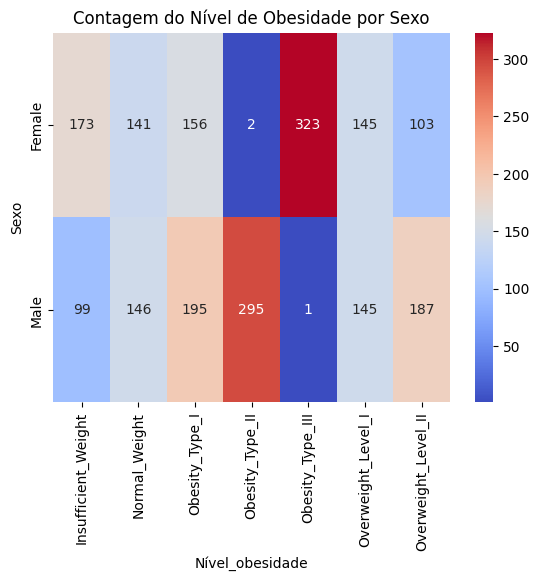

In [94]:
# Criar uma tabela de contingência
contingency_table = pd.crosstab(df_obesidade['Sexo'], df_obesidade['Nível_obesidade'])

# Heatmap
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Contagem do Nível de Obesidade por Sexo')
plt.show()

2 - Impacto de hábitos alimentares: Analisar a relação entre o consumo de alimentos altamente calóricos e o nível de obesidade.

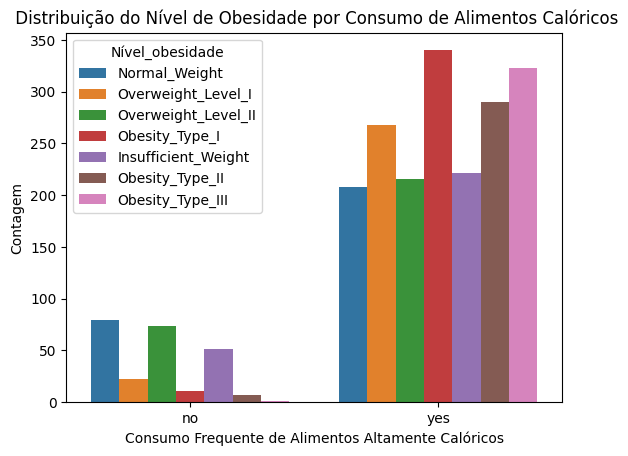

In [54]:
# Gráfico de barras
sns.countplot(x='Consumo_frequente_alimentos_altamente_caloricos', hue='Nível_obesidade', data=df)
plt.xlabel('Consumo Frequente de Alimentos Altamente Calóricos')
plt.ylabel('Contagem')
plt.title(' Distribuição do Nível de Obesidade por Consumo de Alimentos Calóricos')
plt.show()

3- Efeito do uso de tecnologia: Investigar se o tempo de uso de dispositivos tecnológicos está associado ao sedentarismo e à obesidade.

C:\Users\flavi_000\AppData\Local\Temp\ipykernel_10684\2988319133.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Tempo_uso_dispositivos_tecnologia', y='Nível_obesidade', data=df, palette='pastel' )


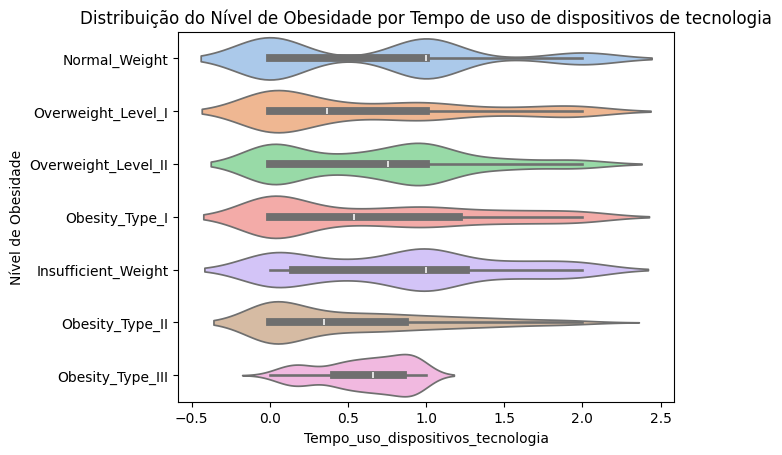

In [88]:
sns.violinplot(x='Tempo_uso_dispositivos_tecnologia', y='Nível_obesidade', data=df, palette='pastel' )
plt.xlabel('Tempo_uso_dispositivos_tecnologia')
plt.ylabel('Nível de Obesidade')
plt.title('Distribuição do Nível de Obesidade por Tempo de uso de dispositivos de tecnologia')


plt.xlabel('Tempo_uso_dispositivos_tecnologia')
plt.ylabel('Nível de Obesidade')
plt.title('Distribuição do Nível de Obesidade por Tempo de uso de dispositivos de tecnologia')

plt.show()

Ao analisar esse gráfico, podemos responder a perguntas como:

Qual a distribuição do nível de obesidade em cada grupo de tempo de uso? 
É mais concentrada em um determinado valor ou espalhada por uma faixa maior?
Existe alguma tendência entre as duas variáveis? 
O nível de obesidade tende a aumentar, diminuir ou permanecer constante à medida que aumenta o tempo de uso de dispositivos?
Há outliers? Existem valores muito diferentes dos demais?

* Relação Positiva: Se os violinos para categorias de "alto tempo de uso" forem mais largos e tiverem medianas mais altas do que os violinos para categorias de "baixo tempo de uso", podemos inferir que existe uma relação positiva entre as duas variáveis. Isso sugeriria que pessoas que passam mais tempo usando dispositivos tendem a ter um nível de obesidade maior.

* Relação Negativa: Se a tendência for oposta, com os violinos mais largos e com medianas mais altas para categorias de "baixo tempo de uso", podemos inferir uma relação negativa.

* Sem Relação: Se não houver uma diferença clara entre os violinos, podemos concluir que não há uma relação clara entre as duas variáveis.
Outliers: A presença de outliers pode indicar situações específicas ou dados que merecem uma análise mais aprofundada.

4 - Comparação do consumo de álcoolentre fumantes, não fumantes e obesidade.


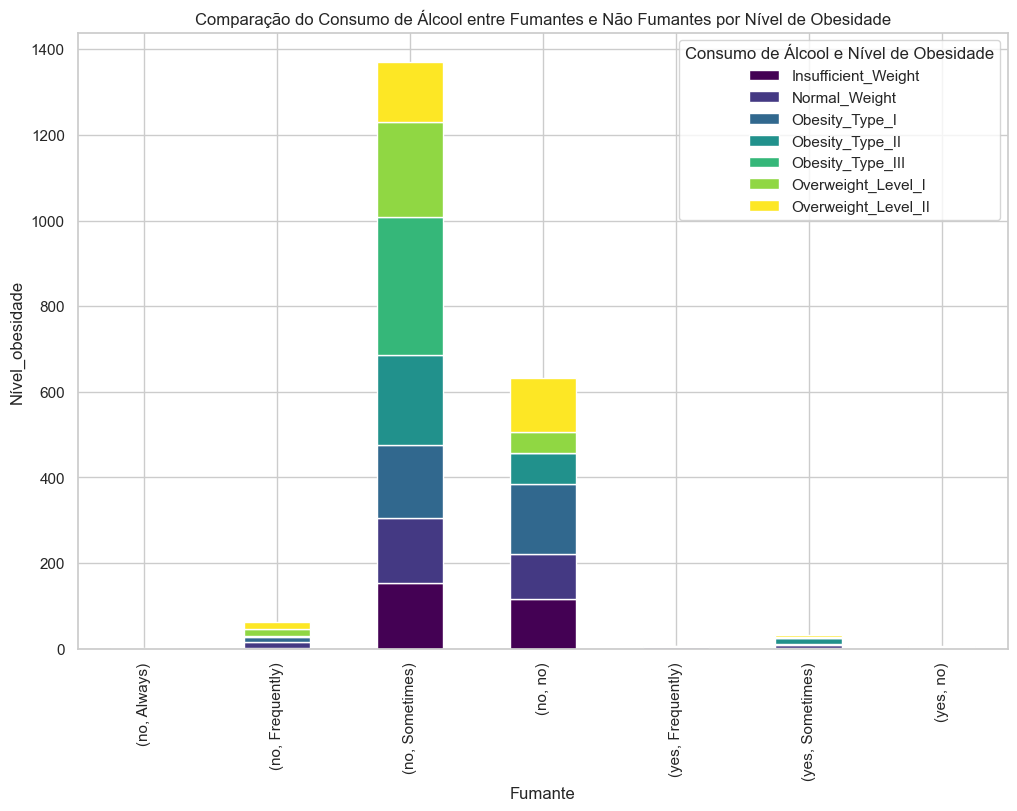

In [95]:
# Criar um dataframe de contagem para cada combinação de 'Fumante', 'Consumo de álcool' e 'Obesidade'
count_df = df_obesidade.groupby(['Fumante', 'Consumo_álcool', 'Nível_obesidade']).size().unstack().fillna(0)

# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras empilhadas
count_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Adicionar títulos e rótulos
plt.title('Comparação do Consumo de Álcool entre Fumantes e Não Fumantes por Nível de Obesidade')
plt.xlabel('Fumante')
plt.ylabel('Nível_obesidade')
plt.legend(title='Consumo de Álcool e Nível de Obesidade')

# Mostrar o gráfico
plt.show()